In [1]:
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import neuralNet as nn
import matplotlib.pyplot as plt
import copy

In [2]:
all_data = loadmat("../ex3data1.mat")
X_all = all_data['X']
y_all = all_data['y']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size = .9)
y_classes = np.unique(y_train)
classDict = dict(zip(range(len(y_classes)),y_classes))

/Users/johnsnyder/.virtualenvs/neuralNetTut/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print(X_train.shape,X_test.shape)
print(y_classes)

(4500, 400) (500, 400)
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train).transpose()

y_train_onehot = label_binarize(y_train,y_classes).transpose()

In [6]:
print(scaler.mean_[25])
print(np.mean(X_train,axis=0)[25])

0.00020025964127934917
0.00020025964127934917


In [7]:
neuralNetMutExc = nn.fullyConnectClassHyper(X_train_scaled,y_train_onehot,classDict,[25,25,25], alpha =.05, p_keep = 0.5, regular = {"lambd":0.5, "N":2}, gradClip = 0.75, gradNorm = 0.5)

In [12]:
neuralNetMutExc.fit(100)

array([441.50960338,  29.90708396,  19.89236336,  24.02959741,
        28.88813851,  30.32068484,  31.02918485,  32.24393747,
        34.46944635,  39.25218301,  45.28068191,  47.17343591,
        47.57154051,  47.73310053,  47.89040706,  48.30527955,
        48.98520352,  50.41352509,  53.35404058,  58.69442646,
        63.86049671,  65.2668487 ,  65.38261381,  65.42809111,
        65.60273545,  65.5412723 ,  65.65195393,  65.6448966 ,
        65.77886056,  65.75796571,  65.757423  ,  65.81376303,
        65.69939086,  65.93353047,  66.05033994,  66.04901931,
        66.08571203,  66.12080706,  66.27214886,  66.46146859,
        66.51493535,  66.39362264,  66.27345371,  66.61827006,
        66.47458641,  66.44443779,  66.69634103,  66.65469468,
        67.01194897,  66.81294293,  67.2617401 ,  66.77217709,
        67.32514876,  67.06917585,  67.38784938,  67.31699614,
        67.55016982,  67.94252088,  67.22626899,  67.9965326 ,
        68.30612989,  68.07088949,  67.9883671 ,  68.04

441.509603380985


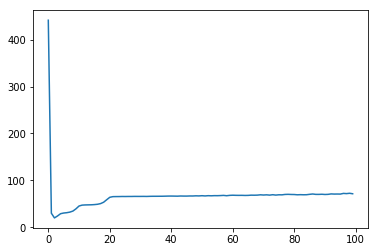

In [13]:
print(neuralNetMutExc.loss_vec[0])
plt.plot(neuralNetMutExc.loss_vec)
plt.show()

In [14]:
#update hyperparameters
hyperDict = {"alpha":.01,"regular":{"N":2,"lambd":1}}
neuralNetMutExc.updateHyperparam(**hyperDict)

In [15]:
neuralNetMutExc.updateHyperparam(fakeParam = 2)

the following are not valid hyperparameter names
 ['fakeParam']
these are the hyperparameters and their values:/n
gradClip :  0.75
regular :  {'N': 2, 'lambd': 1}
p_keep :  0.5
alpha :  0.01
gradNorm :  0.5


In [16]:
neuralNetMutExc.fit(50)

array([90.2342106 , 61.15320181, 50.07011387, 45.25923935, 43.05082363,
       42.13789693, 41.49099346, 41.34014263, 41.15699494, 41.08787153,
       41.08047233, 41.06158025, 41.04338029, 41.05755138, 41.13435345,
       41.04572175, 41.02094525, 41.12049241, 41.16432218, 41.0577594 ,
       41.0822426 , 41.02066541, 40.9832828 , 41.02944729, 41.06892059,
       41.11512243, 41.04139907, 41.03819986, 41.05318236, 41.04976985,
       41.09825842, 41.23171109, 41.11720594, 41.0510945 , 41.05188845,
       41.0804529 , 41.01423244, 41.08603957, 41.03151554, 41.01152568,
       41.01912317, 41.10173795, 41.00800905, 41.04850701, 41.04152323,
       41.13100575, 40.99491352, 41.06979715, 41.09281859, 41.0367049 ])

441.509603380985


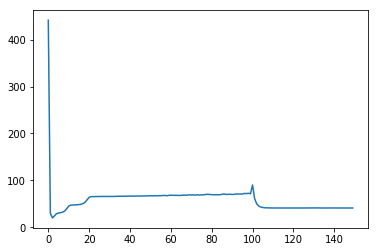

In [17]:
print(neuralNetMutExc.loss_vec[0])
plt.plot(neuralNetMutExc.loss_vec)
plt.show()

In [111]:
print(neuralNetMutExc.loss_vec[0])
plt.plot(neuralNetMutExc.loss_vec)
plt.show()

IndexError: list index out of range

In [14]:
neuralNetMutExc.updateAlpha(.05)
lossVector = neuralNetMutExc.fit(500)

In [15]:
front,back = 0,4

In [16]:
print(y_train[front:back])
print(y_train_onehot[:,front:back])
print(X_train_scaled[:,front:back].shape)


[[9]
 [6]
 [4]
 [8]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 0]]
(400, 4)


In [17]:
neuralNetMutExc.predict(X_train_scaled[:,front:back],y_train_onehot[:,front:back])

(array([[0.1       , 0.09963187, 0.10060632, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.09963187, 0.09993263, 0.1       ],
        [0.1       , 0.1033132 , 0.09993263, 0.1       ]]),
 0.23036756038214373)

In [18]:
print("incoming activations:\n",neuralNetMutExc.layers[-1].A_prev)
print("Y_hat:\n",neuralNetMutExc.layers[-1].y_hat)
print("dY_hat:\n",np.divide(y_train_onehot[:,front:back],neuralNetMutExc.layers[-1].y_hat))
print("softmax delta:\n",neuralNetMutExc.layers[-1].softmax_delta(neuralNetMutExc.layers[-1].A_prev,y_train_onehot[:,front:back]))
print("incoming activation gradients:\n",neuralNetMutExc.layers[-1].backprop(y_train_onehot[:,front:back]))

incoming activations:
 [[0.         0.         0.00671886 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.03628305 0.         0.        ]]
Y_hat:
 [[0.1        0.09963187 0.10060632 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.09963187 0.09993263 0.1       ]
 [0.1        0.1033132  0.09993263 0.1       ]]
dY_hat:
 [[ 0.          0. 

In [ ]:
X_test_scaled = scaler.transform(X_test).transpose()
